# ExaMiniMD
ExaMiniMD is a proxy application and research vehicle for particle codes, in particular Molecular Dynamics (MD). Compared to previous MD proxy apps (MiniMD, COMD), its design is significantly more modular in order to allow independent investigation of different aspects. To achieve that the main components such as force calculation, communication, neighbor list construction and binning are derived classes whose main functionality is accessed via virtual functions. This allows a developer to write a new derived class and drop it into the code without touching much of the rest of the application.

---
## Parameters
```
Compiler = icpc (ICC) 18.0.1 20171018
Build_Flags = -g -O3 -march=nativei -qopenmp
Run_Parameters = -il /home/bhomerding/src/new-proxy-app/ExaMiniMD/input/in.lj --kokkos-threads=72
```

---
## Scaling

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

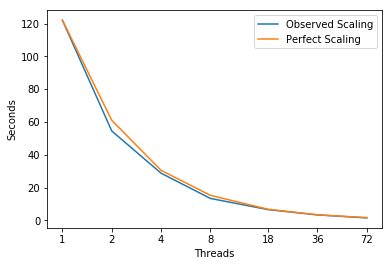

In [2]:
# Plot Measurements
Threads = [1,2,4,8,18,36,72]
fig, ax = plt.subplots(); ax.set_xscale('log', basex=2); ax.set_xticks(Threads)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.plot(Threads,[122.0, 54.5, 28.75, 13.375, 6.555555555555556, 3.3333333333333335, 1.5],
        label='Observed Scaling')
ax.plot(Threads, [122.0, 61.0, 30.5, 15.25, 6.777777777777778, 3.388888888888889, 1.6944444444444444],
        label='Perfect Scaling')
ax.legend(); ax.set_xlabel('Threads'); ax.set_ylabel('Seconds')
plt.show()

---
## Intel Software Development Emulator
| SDE Metrics | ExaMiniMD |
|:-----------|:---:|
| Arithmetic Intensity | 0.22 |
| Bytes per Load Inst | 6.87 |
| Bytes per Store Inst | 5.36 |

---
## Roofline  -  Intel(R) Xeon(R) CPU E5-2699 v3 @ 2.30GHz
### 72 Threads - 36 - Cores 2300.0 Mhz
|     GB/sec     |  L1 B/W |  L2 B/W |  L3 B/W | DRAM B/W |
|:---------------|:-------:|:-------:|:-------:|:--------:|
|**72 Threads**  | 2391.14 |  792.13 | 581.89 |   42.97  |

#### Experiment Aggregate Metrics

| CPUTIME % | IPC per Core | Loads per Cycle | L1 Hits per Cycle | |
|:---:|:---:|:---:|:---:|:---:|
| 100 | 1.26 | 0.27 | 0.29 |  |
|**L1 Miss Ratio** | **L2 Miss Ratio** | **L3 Miss Ratio** | **L2 B/W Utilized** | **L3 B/W Utilized** |
| 4.88% | 19.63% | 16.81% | 10.11% | 4.21% |

## ! Unable to map the measurements to meaningful code sections ! 
Forced to keep at file level for data breakdown

---
#### Kokkos_OpenMP_Parallel.hpp

| CPUTIME % | IPC per Core | Loads per Cycle | L1 Hits per Cycle | |
|:---:|:---:|:---:|:---:|:---:|
| 67.3% | 1.15 | 0.18 | 0.17 |  |
|**L1 Miss Ratio** | **L2 Miss Ratio** | **L3 Miss Ratio** | **L2 B/W Utilized** | **L3 B/W Utilized** |
| 10.10% | 19.88% | 17.43% | 13.24% | 5.43% |

---
#### kmp_wait_release.h

| CPUTIME % | IPC per Core | Loads per Cycle | L1 Hits per Cycle | |
|:---:|:---:|:---:|:---:|:---:|
| 32.1% | 1.50 | 0.45 | 0.55 |  |
|**L1 Miss Ratio** | **L2 Miss Ratio** | **L3 Miss Ratio** | **L2 B/W Utilized** | **L3 B/W Utilized** |
| 0.92% | 15.94% | 8.03% | 3.26% | 1.50% |